Saham Apple

Sumber: yfinance dengan ticker AAPL

Periode data: 1 Januari 2019 – 30 April 2025

In [133]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk Apple Inc.
kode_saham = "AAPL"

# Tentukan rentang waktu
start_date = "2016-01-01"
end_date = "2025-05-15"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)

# Tampilkan 5 data teratas
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.803164,23.807683,23.046253,23.184078,270597600
2016-01-05,23.206680,23.916143,23.138898,23.893549,223164000
2016-01-06,22.752529,23.129856,22.564997,22.720897,273829600
2016-01-07,21.792267,22.623740,21.787749,22.296122,324377600
2016-01-08,21.907494,22.393273,21.862306,22.266745,283192000


In [134]:
# df.to_excel('IHSG.xlsx')

In [135]:
# Import data
import pandas as pd

# df = pd.read_excel('/content/IHSG.xlsx')
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2016-01-04,23.803164,23.807683,23.046253,23.184078,270597600
1,2016-01-05,23.206680,23.916143,23.138898,23.893549,223164000
2,2016-01-06,22.752529,23.129856,22.564997,22.720897,273829600
3,2016-01-07,21.792267,22.623740,21.787749,22.296122,324377600
4,2016-01-08,21.907494,22.393273,21.862306,22.266745,283192000


In [136]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
2350,2025-05-08,197.231369
2351,2025-05-09,198.270004
2352,2025-05-12,210.789993
2353,2025-05-13,212.929993
2354,2025-05-14,212.330002


In [137]:
# data = data[data['Date'] >= '2016-01-01'].reset_index(drop=True)
# data.head()

In [138]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2355 non-null   datetime64[ns]
 1   Close   2355 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.9 KB


In [21]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [139]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,2355,2355.000000
mean,2020-09-05 19:01:36.305732608,106.159101
min,2016-01-04 00:00:00,20.647459
25%,2018-05-05 12:00:00,40.907927
50%,2020-09-04 00:00:00,110.721085
75%,2023-01-07 12:00:00,164.382378
max,2025-05-14 00:00:00,258.396667
std,NaN,67.842552


In [140]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU, Bidirectional, Dropout, Input

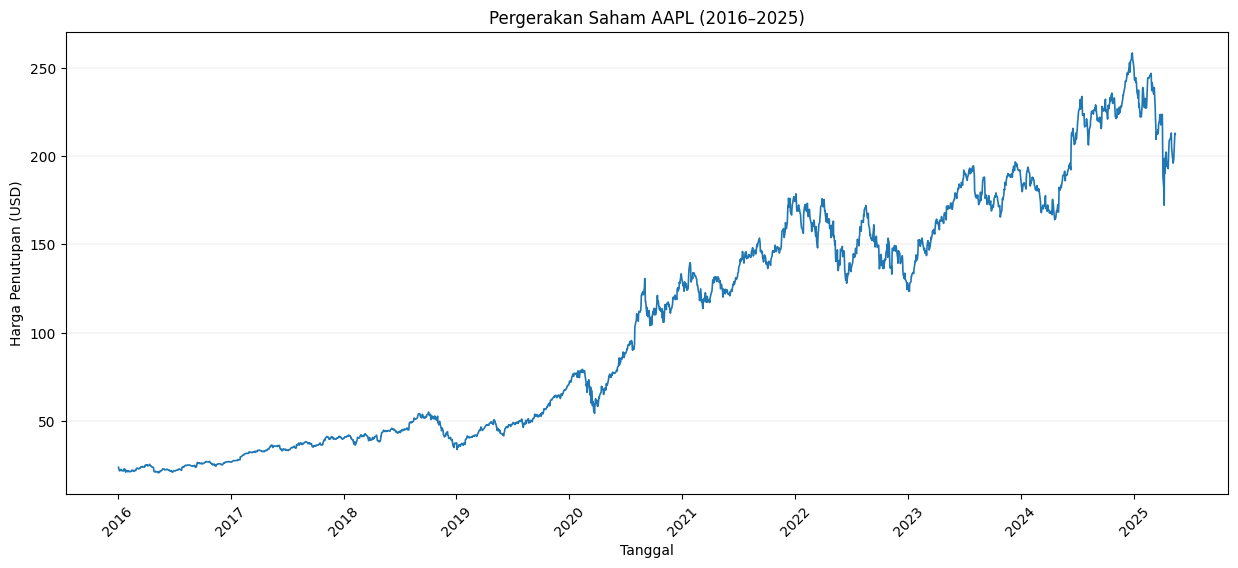

In [141]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Saham AAPL (2016–2025)')
plt.plot(df['Date'], df['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [142]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.01327325],
       [0.01076437],
       [0.00885416],
       ...,
       [0.79976096],
       [0.80876203],
       [0.80623841]])

In [143]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [144]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [145]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [146]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 2355
Jumlah data training: 1884
Jumlah data validasi: 236
Jumlah data testing:235


In [147]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [148]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [149]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [150]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [151]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [152]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# **GRU**

In [153]:
# Membangun model GRU
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import tensorflow as tf

# Model GRU
model_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    GRU(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [154]:
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-4,
    verbose=1,
    restore_best_weights=True
)

# Path simpan model GRU terbaik
checkpoint_path_gru = 'model_checkpoints/weights_gru_model.weights.h5'
os.makedirs(os.path.dirname(checkpoint_path_gru), exist_ok=True)

# Model checkpoint untuk GRU
checkpoint_gru = ModelCheckpoint(
    filepath=checkpoint_path_gru,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)


In [155]:
# Konfigurasi optimizer dan loss function serta Compile Model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_gru.compile(optimizer=optimizer, loss='mean_squared_error')

In [156]:
# Training model GRU
history_gru = model_gru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0736
Epoch 1: val_loss improved from inf to 0.00314, saving model to model_checkpoints/weights_gru_model.weights.h5
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0734 - val_loss: 0.0031
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011
Epoch 2: val_loss improved from 0.00314 to 0.00057, saving model to model_checkpoints/weights_gru_model.weights.h5
232/232 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0011 - val_loss: 5.7338e-04
Epoch 3/100
229/232 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.1825e-04
Epoch 3: val_loss did not improve from 0.00057
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 8.1865e-04 - val_loss: 6.1641e-04
Epoch 4/100
229/232 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.9804e-04
Epoch 4: val_loss improved from 0.00057 to 0.00035, saving model to model_checkpoints/weights_gru_model.weights.h5
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 6.9918e-04 - val_loss: 3.4700e-04
Epoc

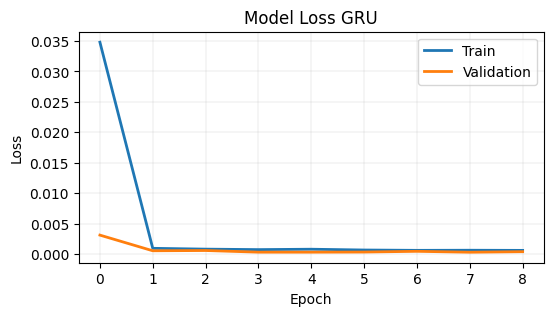

In [157]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_gru.history['loss'], linewidth=2)
plt.plot(history_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True, linewidth=0.18)
plt.show()


In [158]:
# Windowing pada data testing
test_data = data_sc[-(test_len + 30):, :]  # ambil data testing + 30 hari sebelumnya
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# y_test: ambil nilai Close asli untuk dibandingkan nanti
y_test = df[['Close']].iloc[-test_len:].values


In [159]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [160]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [161]:
# Load bobot model terbaik
model_gru.load_weights("/content/model_checkpoints/weights_gru_model.weights.h5")

In [162]:
# Melakukan prediksi
y_pred_gru = model_gru.predict(x_test)
y_pred_gru = np.ceil(sc.inverse_transform(y_pred_gru))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [165]:
# Evaluasi GRU
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmpe(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mse_gru = round(mean_squared_error(y_test, y_pred_gru), 2)
rmse_gru = round(np.sqrt(mse_gru), 2)
mae_gru = round(mean_absolute_error(y_test, y_pred_gru), 2)
rmpe_gru = round(rmpe(y_test, y_pred_gru), 2)

print("=== Evaluasi Model GRU ===")
print(f'MSE  : {mse_gru}')
print(f'RMSE : {rmse_gru}')
print(f'MAE  : {mae_gru}')
print(f'RMPE : {rmpe_gru} %\n')

=== Evaluasi Model GRU ===
MSE  : 57.51
RMSE : 7.58
MAE  : 5.85
RMPE : 2.66 %



In [166]:
# Buat DataFrame hasil prediksi GRU
data_pred_gru = df[-test_len:].copy()
data_pred_gru['Prediction'] = y_pred_gru

# Tampilkan jumlah total baris
print(f"Jumlah baris prediksi: {len(data_pred_gru)}")

# Jika ingin tampilkan seluruh DataFrame
from IPython.display import display
display(data_pred_gru)


Jumlah baris prediksi: 235


,Date,Close,High,Low,Open,Volume,Prediction
2120,2024-06-06,193.574707,195.585308,193.266152,194.779081,41181800,191.0
2121,2024-06-07,195.973495,196.023266,193.236296,193.743917,53103900,192.0
2122,2024-06-10,192.221024,196.381574,191.255538,195.983426,97262100,193.0
2123,2024-06-11,206.185730,206.195693,192.728675,192.748571,172373300,193.0
2124,2024-06-12,212.078201,219.175002,205.936908,206.404722,198134300,194.0
...,...,...,...,...,...,...,...
2350,2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900,203.0
2351,2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900,201.0
2352,2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,200.0
2353,2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300,200.0


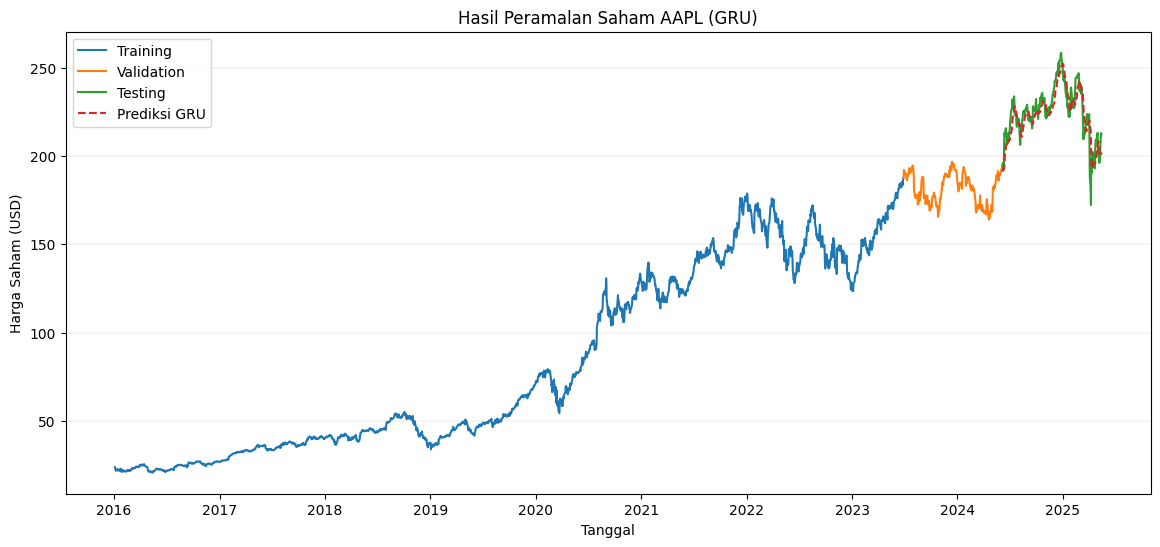

In [167]:
# Visualisasi Prediksi GRU untuk saham AAPL
train = df[:train_len]
valid = df[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham AAPL (GRU)')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_gru['Date'], data_pred_gru['Close'], label='Testing')
plt.plot(data_pred_gru['Date'], data_pred_gru['Prediction'], label='Prediksi GRU', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

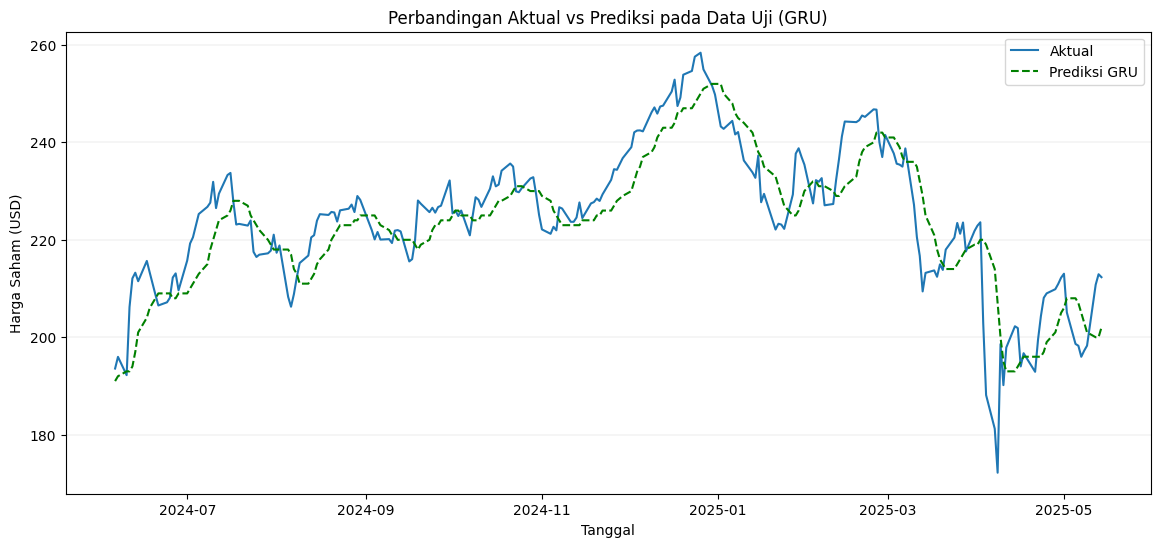

In [168]:
# Visualisasi Prediksi GRU vs Aktual pada Data Uji untuk saham AAPL
plt.figure(figsize=(14,6))
plt.title('Perbandingan Aktual vs Prediksi pada Data Uji (GRU)')
plt.plot(data_pred_gru['Date'], data_pred_gru['Close'], label='Aktual')
plt.plot(data_pred_gru['Date'], data_pred_gru['Prediction'], label='Prediksi GRU', color='green', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()


In [169]:
from datetime import timedelta

# Jumlah hari yang ingin diprediksi
future_steps = 30
last_30_days = data_sc[-30:]  # 30 data terakhir dalam skala normalisasi
future_preds = []

# Bentuk input awal
input_seq = last_30_days.reshape(1, 30, 1)

# Loop prediksi per hari
for _ in range(future_steps):
    next_pred = model_gru.predict(input_seq)[0][0]
    future_preds.append(next_pred)

    # Update input sequence dengan prediksi terbaru
    next_input = np.append(input_seq[0, 1:], [[next_pred]], axis=0)
    input_seq = next_input.reshape(1, 30, 1)

# Kembalikan prediksi ke skala asli
future_preds_actual = np.ceil(sc.inverse_transform(np.array(future_preds).reshape(-1,1)))

# Buat tanggal untuk 30 hari ke depan
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i+1) for i in range(future_steps)]

# DataFrame hasil prediksi
future_df_gru = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_preds_actual.flatten()
})

# Tampilkan hasil prediksi
print("=== Prediksi 30 Hari ke Depan (GRU) ===")
display(future_df_gru)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-05-15,205.0
1,2025-05-16,206.0
2,2025-05-17,206.0
3,2025-05-18,205.0
4,2025-05-19,205.0
5,2025-05-20,205.0
6,2025-05-21,205.0
7,2025-05-22,204.0
8,2025-05-23,204.0
9,2025-05-24,204.0


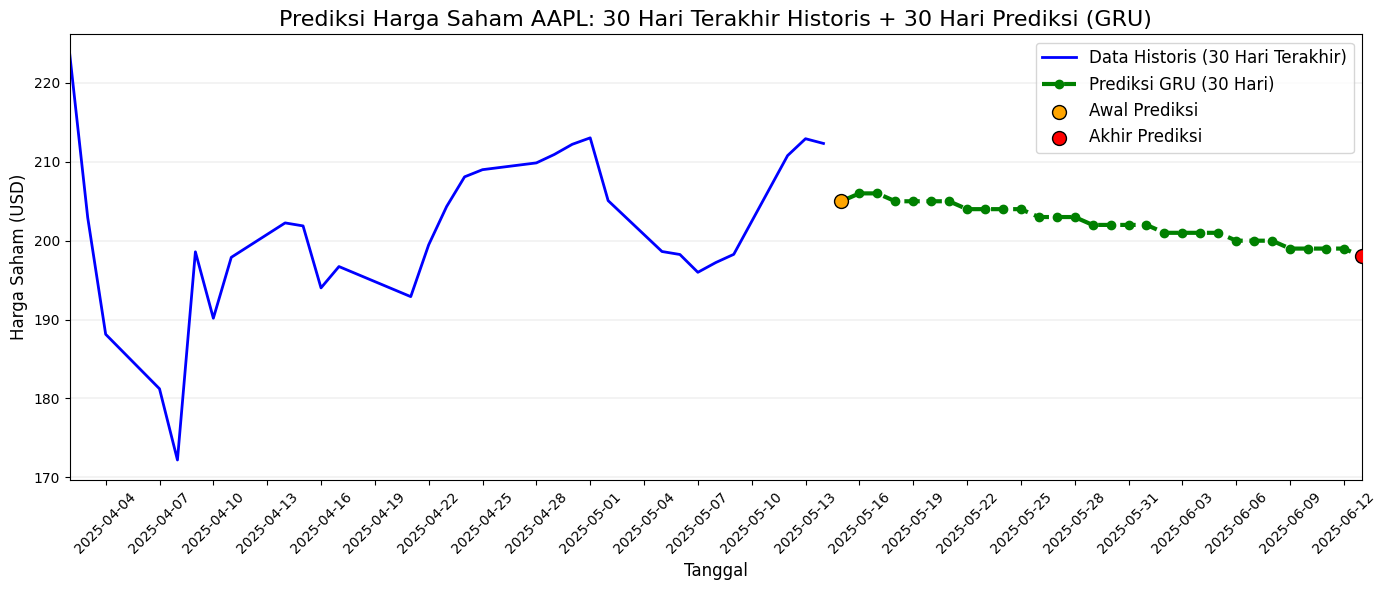

In [170]:
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham AAPL: 30 Hari Terakhir Historis + 30 Hari Prediksi (GRU)', fontsize=16)

# Ambil 30 hari terakhir data historis
last_30_hist = df.tail(30)

# Plot 30 hari terakhir data historis
plt.plot(last_30_hist['Date'], last_30_hist['Close'], label='Data Historis (30 Hari Terakhir)', color='blue', linewidth=2)

# Plot 30 hari prediksi ke depan
plt.plot(future_df_gru['Date'], future_df_gru['Prediction'],
         label='Prediksi GRU (30 Hari)', linestyle='--', color='green', linewidth=3, marker='o', markersize=6)

# Tandai awal dan akhir prediksi
plt.scatter(future_df_gru['Date'].iloc[0], future_df_gru['Prediction'].iloc[0],
            color='orange', label='Awal Prediksi', s=100, zorder=5, edgecolor='black')
plt.scatter(future_df_gru['Date'].iloc[-1], future_df_gru['Prediction'].iloc[-1],
            color='red', label='Akhir Prediksi', s=100, zorder=5, edgecolor='black')

plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Saham (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linewidth=0.2, axis='y')

# Atur batas sumbu X supaya mulai dari 30 hari terakhir historis sampai 30 hari prediksi ke depan
start_zoom = last_30_hist['Date'].min()
end_zoom = future_df_gru['Date'].max()
plt.xlim(start_zoom, end_zoom)

# Format tanggal di sumbu X supaya rapi
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# **BI-GRU**

In [171]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Bidirectional, Input
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Buat model Bi-GRU
model_bigru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(GRU(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [172]:
# Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-4,
    verbose=1,
    restore_best_weights=True
)

checkpoint_path_bigru = 'model_checkpoints/weights_bigru_model.weights.h5'
os.makedirs(os.path.dirname(checkpoint_path_bigru), exist_ok=True)

checkpoint_bigru = ModelCheckpoint(
    filepath=checkpoint_path_bigru,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [173]:
# Compile model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_bigru.compile(optimizer=optimizer, loss='mean_squared_error')

In [174]:
# Training model
history_bigru = model_bigru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bigru, early_stopping]
)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0125
Epoch 1: val_loss improved from inf to 0.00099, saving model to model_checkpoints/weights_bigru_model.weights.h5
232/232 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - loss: 0.0124 - val_loss: 9.9440e-04
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 9.0114e-04
Epoch 2: val_loss improved from 0.00099 to 0.00073, saving model to model_checkpoints/weights_bigru_model.weights.h5
232/232 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - loss: 9.0105e-04 - val_loss: 7.2549e-04
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 8.1984e-04
Epoch 3: val_loss improved from 0.00073 to 0.00067, saving model to model_checkpoints/weights_bigru_model.weights.h5
232/232 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - loss: 8.1986e-04 - val_loss: 6.7435e-04
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.1902e-04
Epoch 4: val_loss improved from 0.00067 to 0.00054, saving model to model_checkpoints/weights_bigru_model.weights.

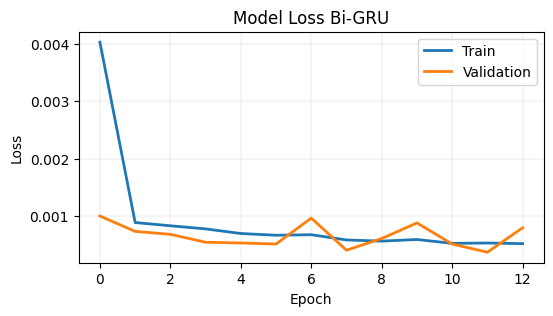

In [175]:
# Menampilkan plot nilai loss Bi-GRU
plt.figure(figsize=(6,3))
plt.plot(history_bigru.history['loss'], linewidth=2)
plt.plot(history_bigru.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True, linewidth=0.18)
plt.show()


In [176]:
# Windowing pada data testing untuk Bi-GRU
test_data = data_sc[-(test_len + 30):, :]  # ambil data testing + 30 hari sebelumnya
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [177]:
# Target asli (label)
y_test = df[['Close']].iloc[-test_len:].values

In [178]:
# Load bobot model Bi-GRU terbaik
model_bigru.load_weights('/content/model_checkpoints/weights_bigru_model.weights.h5')


In [179]:
# Prediksi dengan model Bi-GRU
y_pred_bigru = model_bigru.predict(x_test)
y_pred_bigru = np.ceil(sc.inverse_transform(y_pred_bigru))

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step


In [180]:
# Evaluasi performa Bi-GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
def rmpe(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Evaluasi Bi-GRU
mse_bigru = round(mean_squared_error(y_test, y_pred_bigru), 2)
rmse_bigru = round(np.sqrt(mse_bigru), 2)
mae_bigru = round(mean_absolute_error(y_test, y_pred_bigru), 2)
rmpe_bigru = round(rmpe(y_test, y_pred_bigru), 2)

print("=== Evaluasi Model Bi-GRU ===")
print(f'MSE  : {mse_bigru}')
print(f'RMSE : {rmse_bigru}')
print(f'MAE  : {mae_bigru}')
print(f'RMPE : {rmpe_bigru} %')


=== Evaluasi Model Bi-GRU ===
MSE  : 55.16
RMSE : 7.43
MAE  : 5.11
RMPE : 2.36 %


In [181]:
# Buat dataframe hasil prediksi
data_pred_bigru = df[-test_len:].copy()
data_pred_bigru['Prediction'] = y_pred_bigru

# Tampilkan hasil prediksi
from IPython.display import display
display(data_pred_bigru)


,Date,Close,High,Low,Open,Volume,Prediction
2120,2024-06-06,193.574707,195.585308,193.266152,194.779081,41181800,191.0
2121,2024-06-07,195.973495,196.023266,193.236296,193.743917,53103900,192.0
2122,2024-06-10,192.221024,196.381574,191.255538,195.983426,97262100,193.0
2123,2024-06-11,206.185730,206.195693,192.728675,192.748571,172373300,193.0
2124,2024-06-12,212.078201,219.175002,205.936908,206.404722,198134300,196.0
...,...,...,...,...,...,...,...
2350,2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900,207.0
2351,2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900,205.0
2352,2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,204.0
2353,2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300,207.0


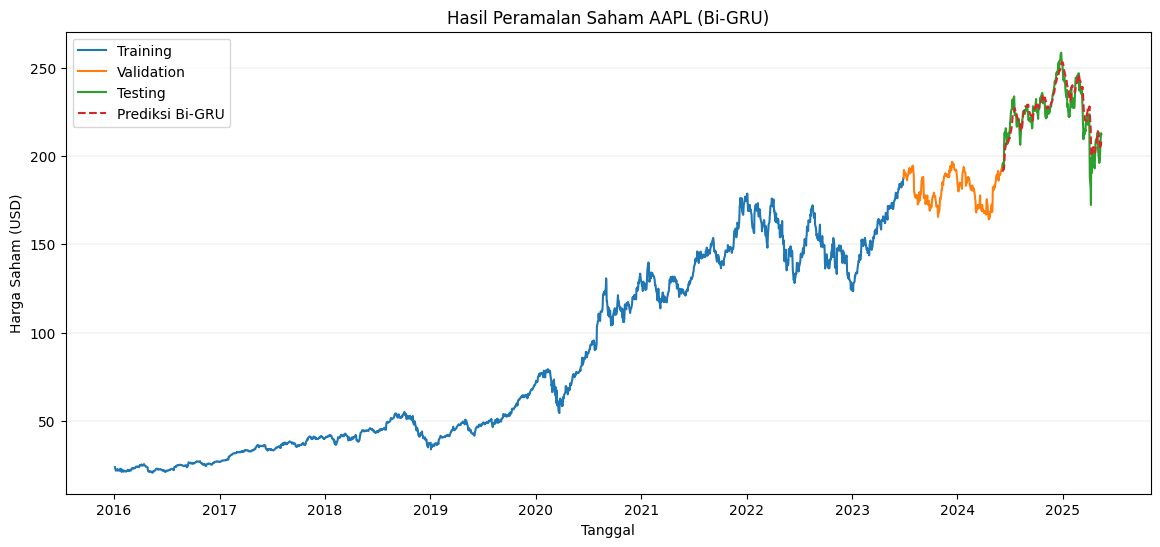

In [182]:
# Visualisasi Prediksi Bi-GRU untuk saham AAPL
train = df[:train_len]
valid = df[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham AAPL (Bi-GRU)')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Close'], label='Testing')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Prediction'], label='Prediksi Bi-GRU', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

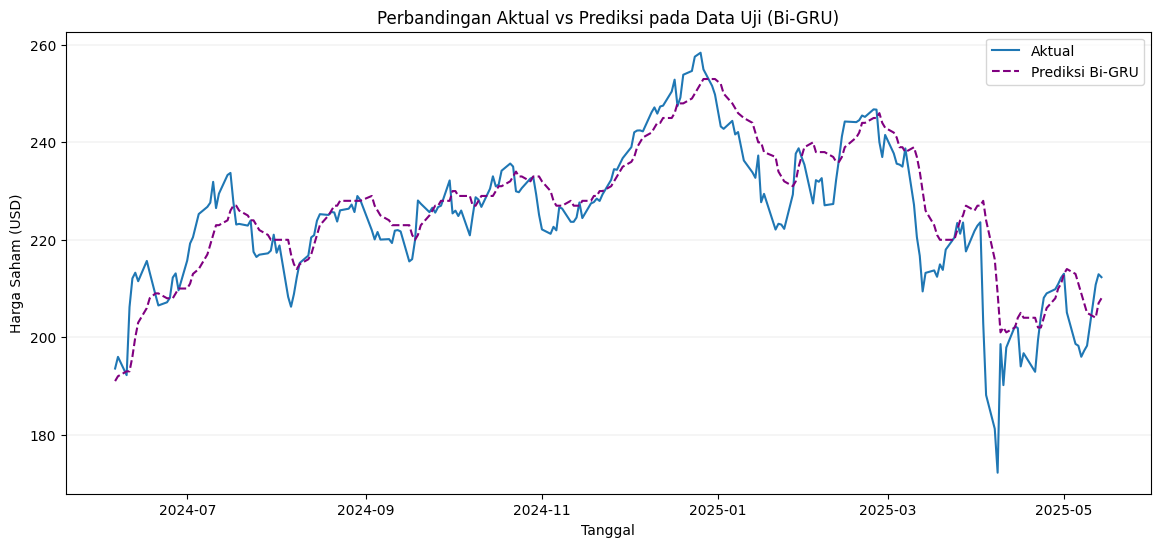

In [183]:
# Visualisasi Prediksi Bi-GRU vs Aktual pada Data Uji untuk saham AAPL
plt.figure(figsize=(14,6))
plt.title('Perbandingan Aktual vs Prediksi pada Data Uji (Bi-GRU)')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Close'], label='Aktual')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Prediction'], label='Prediksi Bi-GRU', color='purple', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [184]:
from datetime import timedelta
import numpy as np
import pandas as pd

# Jumlah hari yang ingin diprediksi
future_steps = 30
last_30_days = data_sc[-30:]  # 30 data terakhir yang sudah diskalakan (normalisasi)
future_preds = []

# Bentuk input awal untuk model Bi-GRU (batch_size=1, time_steps=30, features=1)
input_seq = last_30_days.reshape(1, 30, 1)

# Loop prediksi per hari ke depan
for _ in range(future_steps):
    next_pred = model_bigru.predict(input_seq)[0][0]  # prediksi hari berikutnya
    future_preds.append(next_pred)

    # Update input sequence dengan prediksi terbaru (sliding window)
    next_input = np.append(input_seq[0, 1:], [[next_pred]], axis=0)
    input_seq = next_input.reshape(1, 30, 1)

# Kembalikan hasil prediksi ke skala asli (denormalisasi)
future_preds_actual = np.ceil(sc.inverse_transform(np.array(future_preds).reshape(-1,1)))

# Buat daftar tanggal 30 hari ke depan berdasarkan tanggal terakhir di data asli
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i+1) for i in range(future_steps)]

# Buat DataFrame hasil prediksi Bi-GRU
future_df_bigru = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_preds_actual.flatten()
})

# Tampilkan hasil prediksi
print("=== Prediksi 30 Hari ke Depan (Bi-GRU) ===")
display(future_df_bigru)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-05-15,209.0
1,2025-05-16,208.0
2,2025-05-17,207.0
3,2025-05-18,207.0
4,2025-05-19,207.0
5,2025-05-20,208.0
6,2025-05-21,208.0
7,2025-05-22,208.0
8,2025-05-23,209.0
9,2025-05-24,209.0


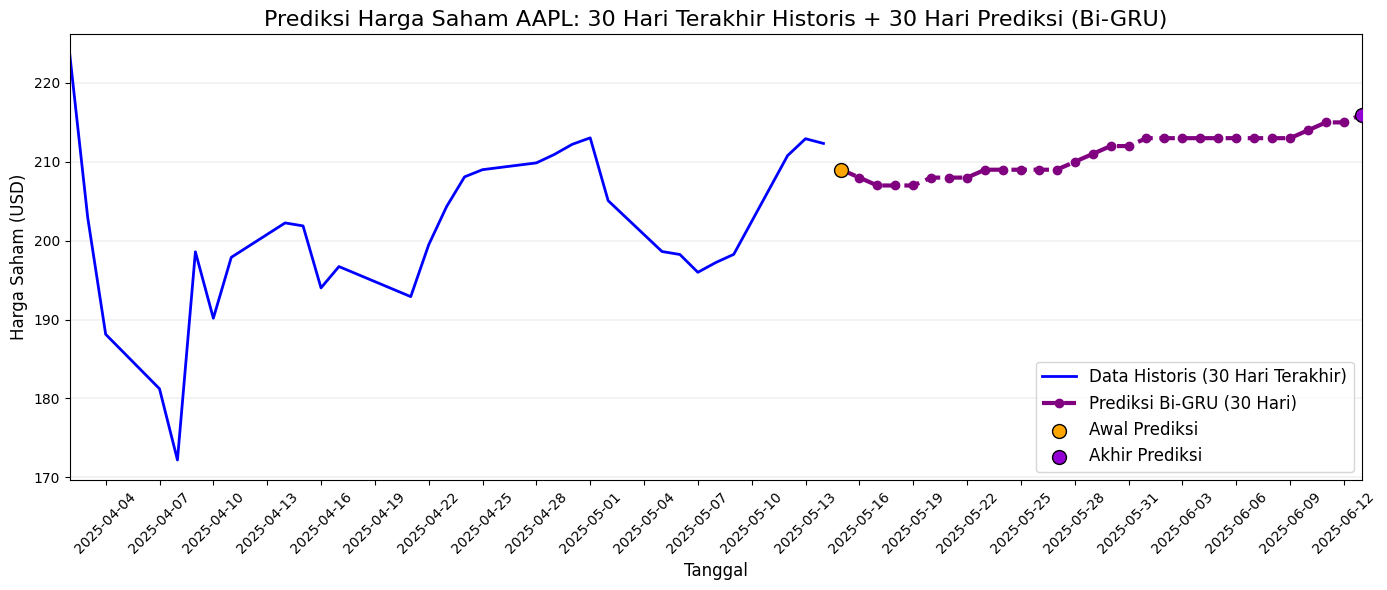

In [185]:
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham AAPL: 30 Hari Terakhir Historis + 30 Hari Prediksi (Bi-GRU)', fontsize=16)

# Ambil 30 hari terakhir data historis
last_30_hist = df.tail(30)

# Plot 30 hari terakhir data historis
plt.plot(last_30_hist['Date'], last_30_hist['Close'], label='Data Historis (30 Hari Terakhir)', color='blue', linewidth=2)

# Plot 30 hari prediksi ke depan dari Bi-GRU
plt.plot(future_df_bigru['Date'], future_df_bigru['Prediction'],
         label='Prediksi Bi-GRU (30 Hari)', linestyle='--', color='purple', linewidth=3, marker='o', markersize=6)

# Tandai awal dan akhir prediksi
plt.scatter(future_df_bigru['Date'].iloc[0], future_df_bigru['Prediction'].iloc[0],
            color='orange', label='Awal Prediksi', s=100, zorder=5, edgecolor='black')
plt.scatter(future_df_bigru['Date'].iloc[-1], future_df_bigru['Prediction'].iloc[-1],
            color='darkviolet', label='Akhir Prediksi', s=100, zorder=5, edgecolor='black')

plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Saham (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linewidth=0.2, axis='y')

# Atur batas sumbu X supaya mulai dari 30 hari terakhir historis sampai 30 hari prediksi ke depan
start_zoom = last_30_hist['Date'].min()
end_zoom = future_df_bigru['Date'].max()
plt.xlim(start_zoom, end_zoom)

# Format tanggal di sumbu X supaya rapi
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# **STACKED GRU**

In [186]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Input

# Model Stacked GRU dengan 2 layer GRU bertingkat
model_stacked_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    GRU(100, return_sequences=True),  # Layer GRU pertama, keluaran sequence utk layer berikutnya
    Dropout(0.2),
    GRU(100, return_sequences=False), # Layer GRU kedua, keluaran final (single vector)
    Dropout(0.2),
    Dense(1)                          # Output layer prediksi 1 nilai
])

In [187]:
# Callback untuk Stacked GRU
early_stopping_stacked_gru = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-4,
    verbose=1,
    restore_best_weights=True
)

# Path untuk menyimpan bobot terbaik
checkpoint_path_stacked_gru = 'model_checkpoints/weights_stacked_gru_model.weights.h5'
os.makedirs(os.path.dirname(checkpoint_path_stacked_gru), exist_ok=True)

# ModelCheckpoint
checkpoint_stacked_gru = ModelCheckpoint(
    filepath=checkpoint_path_stacked_gru,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

In [188]:
# Compile model Stacked GRU
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_stacked_gru.compile(optimizer=optimizer, loss='mean_squared_error')

In [189]:
# Training model
history_stacked_gru = model_stacked_gru.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_stacked_gru, checkpoint_stacked_gru],
    verbose=1
)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0529
Epoch 1: val_loss improved from inf to 0.00744, saving model to model_checkpoints/weights_stacked_gru_model.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0525 - val_loss: 0.0074
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0024
Epoch 2: val_loss improved from 0.00744 to 0.00031, saving model to model_checkpoints/weights_stacked_gru_model.weights.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0024 - val_loss: 3.1327e-04
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0010
Epoch 3: val_loss did not improve from 0.00031
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0010 - val_loss: 3.1577e-04
Epoch 4/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0010
Epoch 4: val_loss did not improve from 0.00031
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0010 - val_loss: 3.9578e-04
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.0513e-04
Epoch 5: val_loss

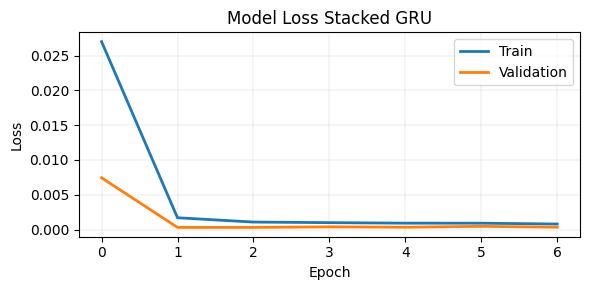

In [190]:
# Menampilkan plot nilai loss Stacked GRU
plt.figure(figsize=(6, 3))
plt.plot(history_stacked_gru.history['loss'], linewidth=2)
plt.plot(history_stacked_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss Stacked GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid(True, linewidth=0.18)
plt.tight_layout()
plt.show()

In [191]:
# Windowing pada data testing untuk Stacked GRU
test_data_stacked = data_sc[-(test_len + 30):, :]  # ambil data testing + 30 hari sebelumnya

x_test_stacked = []
for i in range(30, len(test_data_stacked)):
    x_test_stacked.append(test_data_stacked[i - 30:i, 0])  # window 30 langkah waktu

x_test_stacked = np.array(x_test_stacked)
x_test_stacked = x_test_stacked.reshape((x_test_stacked.shape[0], x_test_stacked.shape[1], 1))  # shape: (samples, 30, 1)

In [192]:
# Target asli (label)
y_test = df[['Close']].iloc[-test_len:].values

In [193]:
# Load bobot model Stacked GRU terbaik
model_stacked_gru.load_weights('/content/model_checkpoints/weights_stacked_gru_model.weights.h5')

In [194]:
# Prediksi dengan model Stacked GRU
y_pred_stacked_gru = model_stacked_gru.predict(x_test)
y_pred_stacked_gru = np.ceil(sc.inverse_transform(y_pred_stacked_gru))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmpe(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse_stacked_gru = round(mean_squared_error(y_test, y_pred_stacked_gru), 2)
rmse_stacked_gru = round(np.sqrt(mse_stacked_gru), 2)
mae_stacked_gru = round(mean_absolute_error(y_test, y_pred_stacked_gru), 2)
rmpe_stacked_gru = round(rmpe(y_test, y_pred_stacked_gru), 2)

print("=== Evaluasi Model Stacked GRU ===")
print(f'MSE  : {mse_stacked_gru}')
print(f'RMSE : {rmse_stacked_gru}')
print(f'MAE  : {mae_stacked_gru}')
print(f'RMPE : {rmpe_stacked_gru} %')

=== Evaluasi Model Stacked GRU ===
MSE  : 54.09
RMSE : 7.35
MAE  : 5.7
RMPE : 2.59 %


In [196]:
# Buat dataframe hasil prediksi Stacked GRU
data_pred_stacked_gru = df[-test_len:].copy()
data_pred_stacked_gru['Prediction'] = y_pred_stacked_gru

# Tampilkan hasil prediksi
from IPython.display import display
display(data_pred_stacked_gru)

,Date,Close,High,Low,Open,Volume,Prediction
2120,2024-06-06,193.574707,195.585308,193.266152,194.779081,41181800,191.0
2121,2024-06-07,195.973495,196.023266,193.236296,193.743917,53103900,192.0
2122,2024-06-10,192.221024,196.381574,191.255538,195.983426,97262100,193.0
2123,2024-06-11,206.185730,206.195693,192.728675,192.748571,172373300,193.0
2124,2024-06-12,212.078201,219.175002,205.936908,206.404722,198134300,195.0
...,...,...,...,...,...,...,...
2350,2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900,203.0
2351,2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900,201.0
2352,2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,200.0
2353,2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300,201.0


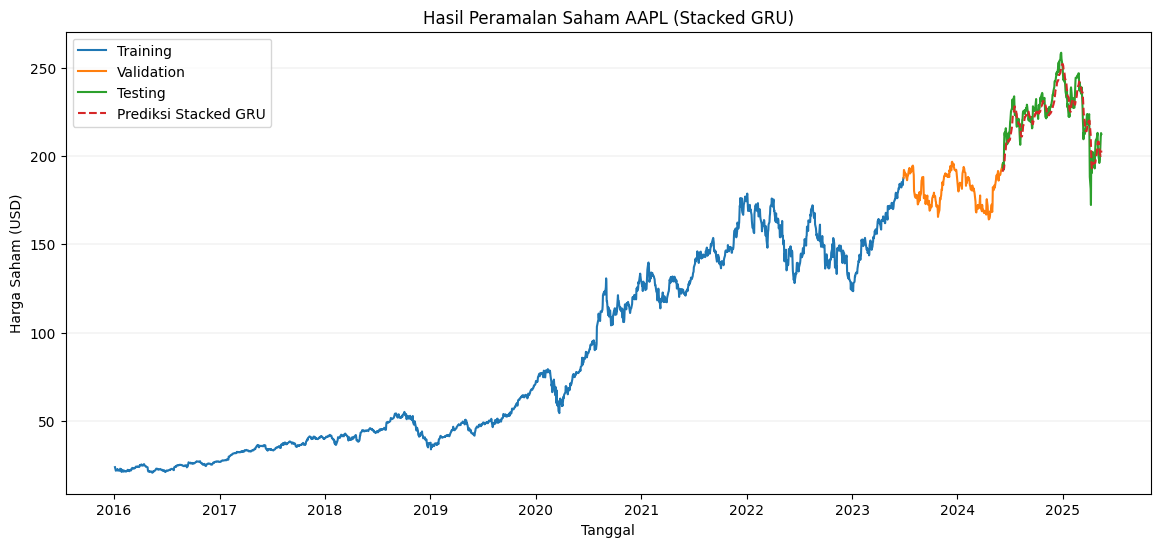

In [197]:
# Visualisasi Prediksi Stacked GRU untuk saham AAPL
train = df[:train_len]
valid = df[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham AAPL (Stacked GRU)')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Close'], label='Testing')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Prediction'], label='Prediksi Stacked GRU', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

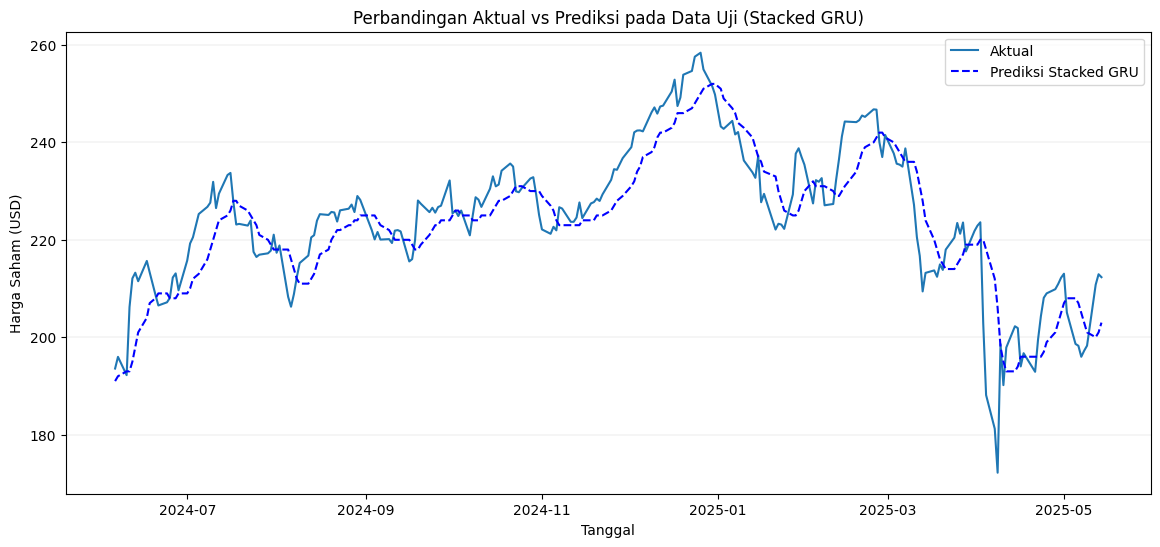

In [198]:
# Visualisasi Prediksi Stacked GRU vs Aktual pada Data Uji untuk saham AAPL
plt.figure(figsize=(14,6))
plt.title('Perbandingan Aktual vs Prediksi pada Data Uji (Stacked GRU)')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Close'], label='Aktual')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Prediction'], label='Prediksi Stacked GRU', color='blue', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [199]:
from datetime import timedelta
import numpy as np
import pandas as pd

# Jumlah hari yang ingin diprediksi
future_steps = 30
last_30_days = data_sc[-30:]  # 30 data terakhir yang sudah diskalakan (normalisasi)
future_preds = []

# Bentuk input awal untuk model Stacked GRU (batch_size=1, time_steps=30, features=1)
input_seq = last_30_days.reshape(1, 30, 1)

# Loop prediksi per hari ke depan
for _ in range(future_steps):
    next_pred = model_stacked_gru.predict(input_seq)[0][0]  # prediksi hari berikutnya
    future_preds.append(next_pred)

    # Update input sequence dengan prediksi terbaru (sliding window)
    next_input = np.append(input_seq[0, 1:], [[next_pred]], axis=0)
    input_seq = next_input.reshape(1, 30, 1)

# Kembalikan hasil prediksi ke skala asli (denormalisasi)
future_preds_actual = np.ceil(sc.inverse_transform(np.array(future_preds).reshape(-1,1)))

# Buat daftar tanggal 30 hari ke depan berdasarkan tanggal terakhir di data asli
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i+1) for i in range(future_steps)]

# Buat DataFrame hasil prediksi Stacked GRU
future_df_stacked_gru = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_preds_actual.flatten()
})

# Tampilkan hasil prediksi
print("=== Prediksi 30 Hari ke Depan (Stacked GRU) ===")
display(future_df_stacked_gru)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-05-15,205.0
1,2025-05-16,206.0
2,2025-05-17,206.0
3,2025-05-18,205.0
4,2025-05-19,205.0
5,2025-05-20,205.0
6,2025-05-21,205.0
7,2025-05-22,204.0
8,2025-05-23,204.0
9,2025-05-24,204.0


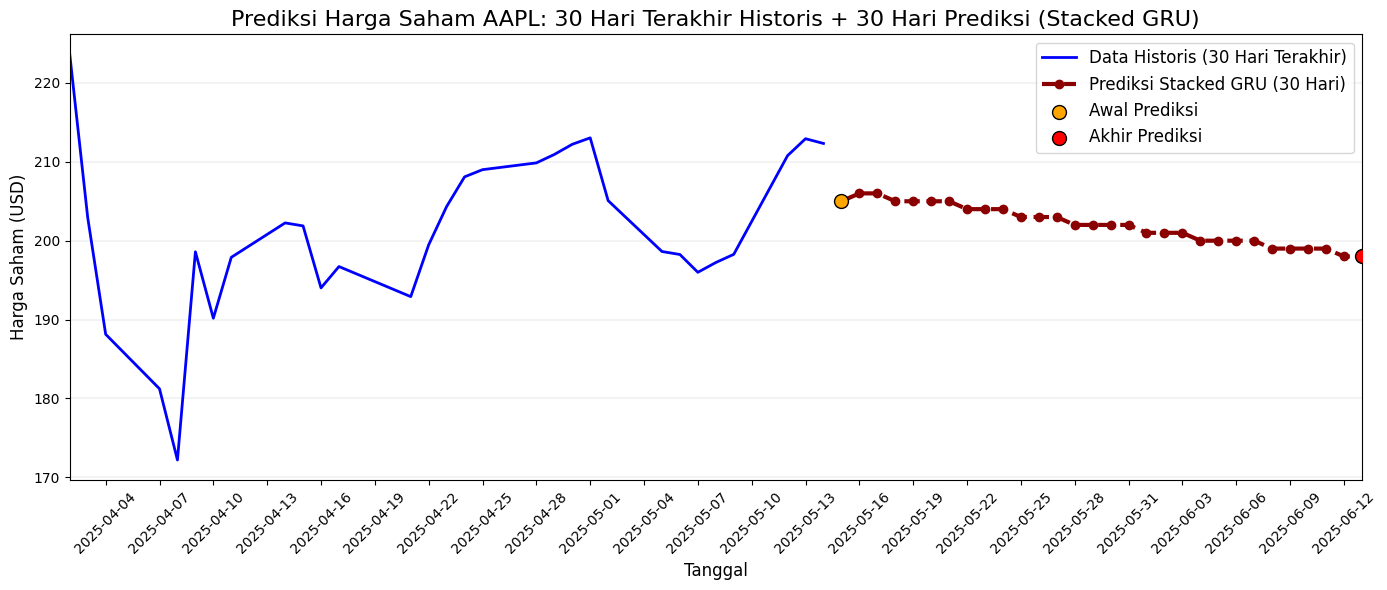

In [200]:
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham AAPL: 30 Hari Terakhir Historis + 30 Hari Prediksi (Stacked GRU)', fontsize=16)

# Ambil 30 hari terakhir data historis
last_30_hist = df.tail(30)

# Plot 30 hari terakhir data historis
plt.plot(last_30_hist['Date'], last_30_hist['Close'], label='Data Historis (30 Hari Terakhir)', color='blue', linewidth=2)

# Plot 30 hari prediksi ke depan dari Stacked GRU
plt.plot(future_df_stacked_gru['Date'], future_df_stacked_gru['Prediction'],
         label='Prediksi Stacked GRU (30 Hari)', linestyle='--', color='darkred', linewidth=3, marker='o', markersize=6)

# Tandai awal dan akhir prediksi
plt.scatter(future_df_stacked_gru['Date'].iloc[0], future_df_stacked_gru['Prediction'].iloc[0],
            color='orange', label='Awal Prediksi', s=100, zorder=5, edgecolor='black')
plt.scatter(future_df_stacked_gru['Date'].iloc[-1], future_df_stacked_gru['Prediction'].iloc[-1],
            color='red', label='Akhir Prediksi', s=100, zorder=5, edgecolor='black')

plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Saham (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linewidth=0.2, axis='y')

# Atur batas sumbu X supaya mulai dari 30 hari terakhir historis sampai 30 hari prediksi ke depan
start_zoom = last_30_hist['Date'].min()
end_zoom = future_df_stacked_gru['Date'].max()
plt.xlim(start_zoom, end_zoom)

# Format tanggal di sumbu X supaya rapi
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# **Perbandingan GRU, BI-GRU, STACKED GRU**

In [201]:
print("=== Evaluasi Model GRU ===")
print(f'MSE  : {mse_gru}')
print(f'RMSE : {rmse_gru}')
print(f'MAE  : {mae_gru}')
print(f'MAPE : {mape_gru} %\n')

print("=== Evaluasi Model Bi-GRU ===")
print(f'MSE  : {mse_bigru}')
print(f'RMSE : {rmse_bigru}')
print(f'MAE  : {mae_bigru}')
print(f'MAPE : {mape_bigru} %\n')

print("=== Evaluasi Model Stacked GRU ===")
print(f'MSE  : {mse_stacked_gru}')
print(f'RMSE : {rmse_stacked_gru}')
print(f'MAE  : {mae_stacked_gru}')
print(f'MAPE : {mape_stacked_gru} %')

=== Evaluasi Model GRU ===
MSE  : 57.51
RMSE : 7.58
MAE  : 5.85
MAPE : 2.26 %

=== Evaluasi Model Bi-GRU ===
MSE  : 55.16
RMSE : 7.43
MAE  : 5.11
MAPE : 2.31 %

=== Evaluasi Model Stacked GRU ===
MSE  : 54.09
RMSE : 7.35
MAE  : 5.7
MAPE : 2.63 %


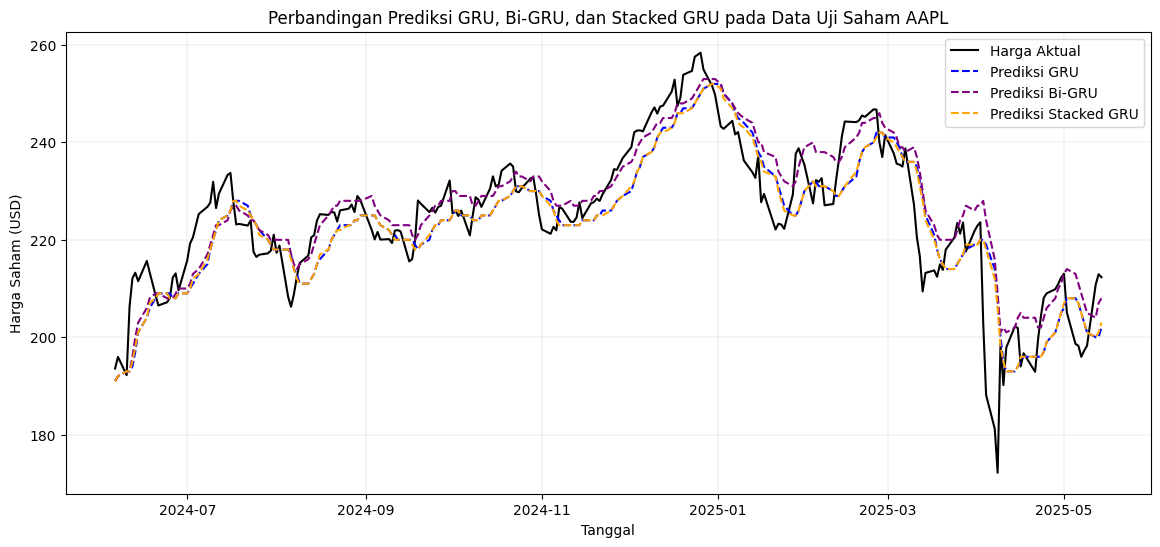

In [202]:
plt.figure(figsize=(14,6))
plt.title('Perbandingan Prediksi GRU, Bi-GRU, dan Stacked GRU pada Data Uji Saham AAPL')

# Plot data aktual
plt.plot(data_pred_gru['Date'], data_pred_gru['Close'], label='Harga Aktual', color='black')

# Plot prediksi GRU
plt.plot(data_pred_gru['Date'], data_pred_gru['Prediction'], label='Prediksi GRU', linestyle='--', color='blue')

# Plot prediksi Bi-GRU
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Prediction'], label='Prediksi Bi-GRU', linestyle='--', color='purple')

# Plot prediksi Stacked GRU
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Prediction'], label='Prediksi Stacked GRU', linestyle='--', color='orange')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.grid(True, linewidth=0.18)
plt.show()

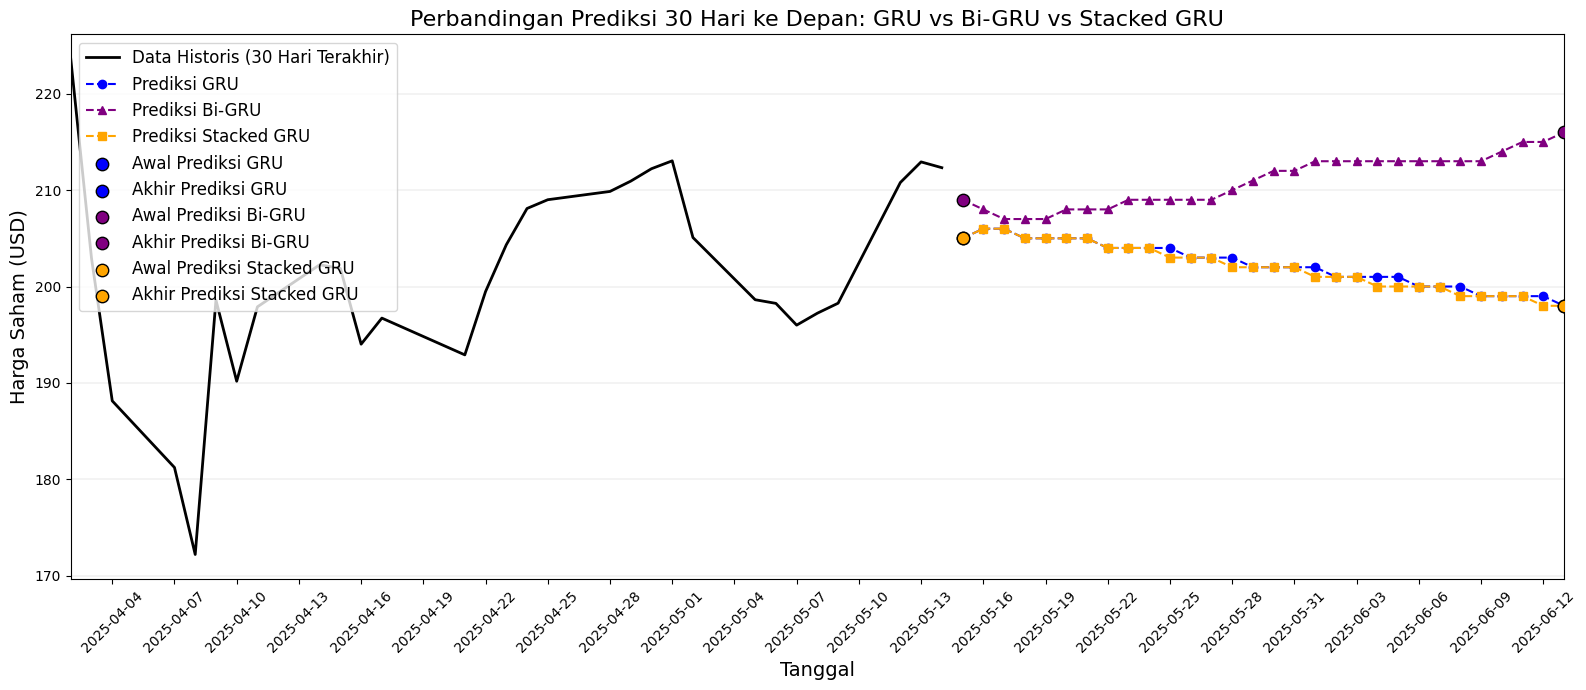

In [203]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(16,7))
plt.title('Perbandingan Prediksi 30 Hari ke Depan: GRU vs Bi-GRU vs Stacked GRU', fontsize=16)

# Ambil 30 hari terakhir data historis (untuk referensi)
last_30_hist = df.tail(30)

# Plot data historis 30 hari terakhir
plt.plot(last_30_hist['Date'], last_30_hist['Close'], label='Data Historis (30 Hari Terakhir)', color='black', linewidth=2)

# Plot prediksi 30 hari ke depan masing-masing model
plt.plot(future_df_gru['Date'], future_df_gru['Prediction'], label='Prediksi GRU', linestyle='--', color='blue', marker='o')
plt.plot(future_df_bigru['Date'], future_df_bigru['Prediction'], label='Prediksi Bi-GRU', linestyle='--', color='purple', marker='^')
plt.plot(future_df_stacked_gru['Date'], future_df_stacked_gru['Prediction'], label='Prediksi Stacked GRU', linestyle='--', color='orange', marker='s')

# Tandai awal dan akhir prediksi tiap model
plt.scatter(future_df_gru['Date'].iloc[0], future_df_gru['Prediction'].iloc[0], color='blue', s=80, edgecolor='black', label='Awal Prediksi GRU', zorder=5)
plt.scatter(future_df_gru['Date'].iloc[-1], future_df_gru['Prediction'].iloc[-1], color='blue', s=80, edgecolor='black', label='Akhir Prediksi GRU', zorder=5)

plt.scatter(future_df_bigru['Date'].iloc[0], future_df_bigru['Prediction'].iloc[0], color='purple', s=80, edgecolor='black', label='Awal Prediksi Bi-GRU', zorder=5)
plt.scatter(future_df_bigru['Date'].iloc[-1], future_df_bigru['Prediction'].iloc[-1], color='purple', s=80, edgecolor='black', label='Akhir Prediksi Bi-GRU', zorder=5)

plt.scatter(future_df_stacked_gru['Date'].iloc[0], future_df_stacked_gru['Prediction'].iloc[0], color='orange', s=80, edgecolor='black', label='Awal Prediksi Stacked GRU', zorder=5)
plt.scatter(future_df_stacked_gru['Date'].iloc[-1], future_df_stacked_gru['Prediction'].iloc[-1], color='orange', s=80, edgecolor='black', label='Akhir Prediksi Stacked GRU', zorder=5)

plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Harga Saham (USD)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linewidth=0.2, axis='y')

# Set batas sumbu x mulai dari 30 hari terakhir historis sampai 30 hari prediksi
plt.xlim(last_30_hist['Date'].min(), future_df_gru['Date'].max())

# Format tanggal rapi di sumbu X
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [204]:
import pandas as pd

hasil_perbandingan = pd.DataFrame({
    'Model': ['GRU', 'Bi-GRU', 'Stacked GRU'],
    'MSE': [mse_gru, mse_bigru, mse_stacked_gru],
    'RMSE': [rmse_gru, rmse_bigru, rmse_stacked_gru],
    'MAE': [mae_gru, mae_bigru, mae_stacked_gru],
    'MAPE (%)': [mape_gru, mape_bigru, mape_stacked_gru]
})

display(hasil_perbandingan)

,Model,MSE,RMSE,MAE,MAPE (%)
0,GRU,57.51,7.58,5.85,2.26
1,Bi-GRU,55.16,7.43,5.11,2.31
2,Stacked GRU,54.09,7.35,5.70,2.63
